# Part 1

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

## Question 1

#### Load Dataset

In [2]:
data = pd.read_csv("./wine-missing.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].mean())
data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].mean())
data['citric acid'] = data['citric acid'].fillna(data['citric acid'].mean())
data['residual sugar'] = data['residual sugar'].fillna(data['residual sugar'].mean())
data['chlorides'] = data['chlorides'].fillna(data['chlorides'].mean())
data['pH'] = data['pH'].fillna(data['pH'].mean())
data['sulphates'] = data['sulphates'].fillna(data['sulphates'].mean())

data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Describe data

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Plot the distribution of data

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

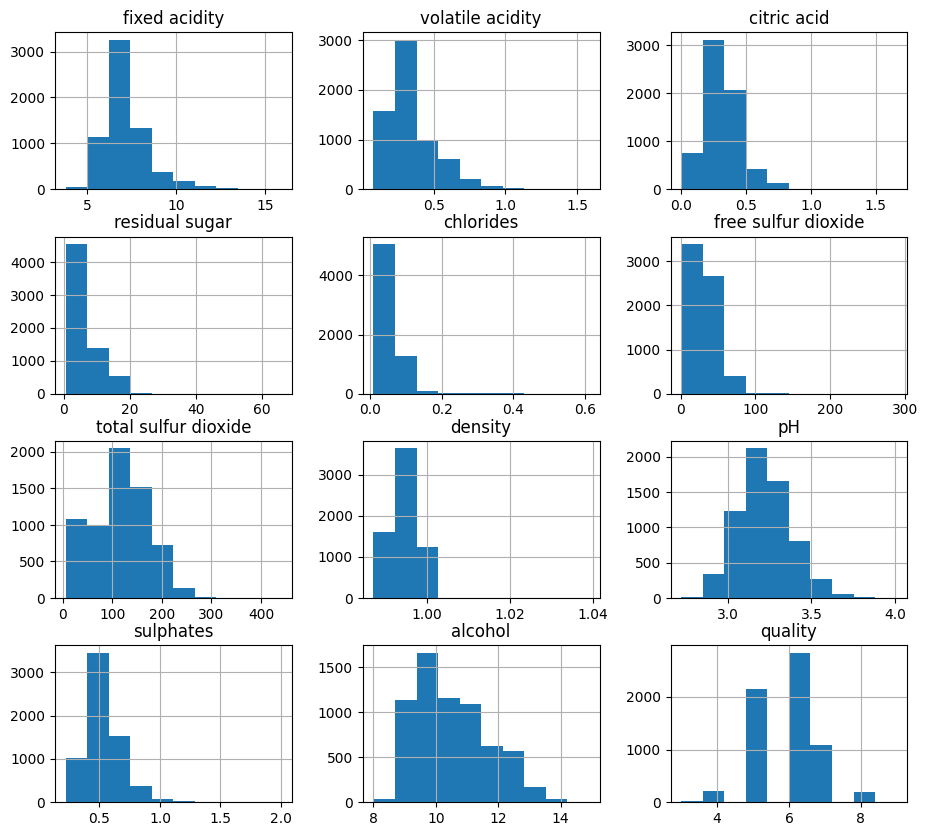

In [6]:
data.hist(bins=10, figsize=(11,10))

#### Bar plot for Wine Types

In [7]:
cnt = data["type"].value_counts()
cnt

type
unknown    3898
white      1959
red         640
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of each wine type')

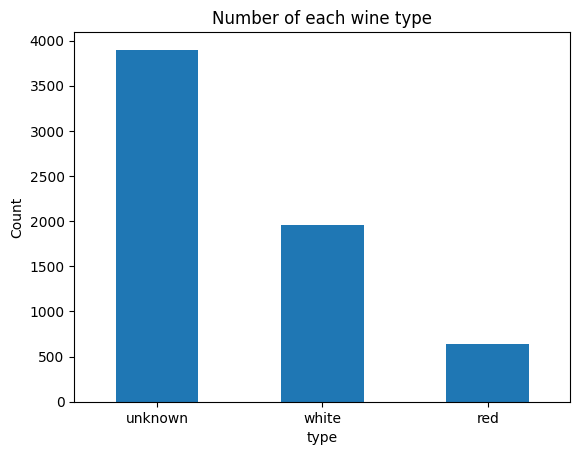

In [8]:
cnt.plot(kind="bar")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Number of each wine type")

## Question 2

#### Map wine types to numbers

In [9]:
data["type"] = data["type"].map({"white":0, "red":1, "unknown":2})

In [10]:
mappedCnt = data["type"].value_counts()
mappedCnt

type
2    3898
0    1959
1     640
Name: count, dtype: int64

#### Split our data (Features/Target)

In [11]:
x = np.array(data.drop(columns=["type"]))
y = np.array(data["type"])

x.shape, y.shape

((6497, 12), (6497,))

In [12]:
type(x)

numpy.ndarray

## Question 3

In [13]:
mask_known = y!=2
mask_unknown = y==2

x_known = x[mask_known]
y_known = y[mask_known]

x_unknown = x[mask_unknown]

x_known.shape, y_known.shape, x_unknown.shape

((2599, 12), (2599,), (3898, 12))

## Question 4

In [14]:
test_size = 0.30
seed=42

x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, random_state=seed, test_size=test_size, stratify=y_known)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1819, 12), (780, 12), (1819,), (780,))

## Question 5

In [15]:
forest = RandomForestClassifier(random_state=seed)

In [16]:
forest.fit(x_known,y_known)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Metrics in training set**

In [17]:
ypred_train = forest.predict(x_train)
accuracy = accuracy_score(y_train, ypred_train)
accuracy = round(accuracy*100, 2)

f1 = f1_score(y_train, ypred_train)
f1 = round(f1*100, 2)

precision = precision_score(y_train, ypred_train)
precision = round(precision*100, 2)

recall = recall_score(y_train, ypred_train)
recall = round(recall*100, 2)

print(f"Model's accuracy in training set: {accuracy}%")
print(f"Model's F1 score in training set: {f1}%")
print(f"Model's preceision in training set: {precision}%")
print(f"Model's recall in training set: {recall}%")

Model's accuracy in training set: 99.95%
Model's F1 score in training set: 99.89%
Model's preceision in training set: 99.78%
Model's recall in training set: 100.0%


**Metrics in test set**

In [18]:
ypred_test = forest.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred_test)
test_accuracy = round(test_accuracy*100, 2)

test_f1 = f1_score(y_test, ypred_test)
test_f1 = round(test_f1*100, 2)

test_precision = precision_score(y_test, ypred_test)
test_precision = round(test_precision*100, 2)

test_recall = recall_score(y_test, ypred_test)
test_recall = round(test_recall*100, 2)

print(f"Model's accuracy in test set: {test_accuracy}%")
print(f"Model's F1 score in test set: {test_f1}%")
print(f"Model's preceision in test set: {test_precision}%")
print(f"Model's recall in test set: {test_recall}%")

Model's accuracy in test set: 100.0%
Model's F1 score in test set: 100.0%
Model's preceision in test set: 100.0%
Model's recall in test set: 100.0%


Για τα δεδομένα μας, που τα περισσότερα χαρακτηριστικά ακολουθούν μία πιο εκθετική κατανομή και δεν είναι κατανεμημένα ομοιόμορφα, η πιο ανταπροσωπευτική μετρική είναι η F1.
Αυτό ισχύει διότι με τον τρόπο που υπολογίζεται η F1 (αρμονικός μέσος όρος του recall και του precision), 'τιμωρούνται' περισσότερο οι ακραίες τιμές που παρουσιάζονται στα δεδομένα μας.


## Question 6

In [19]:
forest2 = RandomForestClassifier(random_state=seed, class_weight='balanced')

Η παράμετρος `class_weight` τοποθετεί βάρη στις κλάσεις που έχει το πρόβλημα μας, στην περίπτωσή μας στο 0:"white" και 1:"red". Βάζοντας την τιμή **balanced** στην παράμετρο, το μοντέλο τοποθετεί αντίστοιχα βάρη στις 2 κλάσσεις έτσι ώστε να τα εξισσοροπήσει εφόσον έχουμε πολύ λιγότερα δείγματα για την κλάση 1:"red" (640-1 προς 1959-0). Συγκεκριμένα από τον τύπο που δίνεται στο documentation, για το παράδειγμά μας θα έχουμε τα εξής βάρη:

- Weight of 0:"white" -> train_samples/(y_train_classes`*`np.bincount(y_train)) = 1819/(2`*`1372) = 0.66
- Weight of 1:"red" -> 1819/(2`*`447) = 2.03

In [20]:
forest2.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Metrics in training set**

In [21]:
ypred_train = forest2.predict(x_train)
accuracy = accuracy_score(y_train, ypred_train)
accuracy = round(accuracy*100, 2)

f1 = f1_score(y_train, ypred_train)
f1 = round(f1*100, 2)

precision = precision_score(y_train, ypred_train)
precision = round(precision*100, 2)

recall = recall_score(y_train, ypred_train)
recall = round(recall*100, 2)

print(f"Model's accuracy in training set: {accuracy}%")
print(f"Model's F1 score in training set: {f1}%")
print(f"Model's preceision in training set: {precision}%")
print(f"Model's recall in training set: {recall}%")

Model's accuracy in training set: 99.95%
Model's F1 score in training set: 99.89%
Model's preceision in training set: 99.78%
Model's recall in training set: 100.0%


**Metrics in test set**

In [22]:
ypred_test = forest2.predict(x_test)
test_accuracy = accuracy_score(y_test, ypred_test)
test_accuracy = round(test_accuracy*100, 2)

test_f1 = f1_score(y_test, ypred_test)
test_f1 = round(test_f1*100, 2)

test_precision = precision_score(y_test, ypred_test)
test_precision = round(test_precision*100, 2)

test_recall = recall_score(y_test, ypred_test)
test_recall = round(test_recall*100, 2)

print(f"Model's accuracy in test set: {test_accuracy}%")
print(f"Model's F1 score in test set: {test_f1}%")
print(f"Model's preceision in test set: {test_precision}%")
print(f"Model's recall in test set: {test_recall}%")

Model's accuracy in test set: 99.62%
Model's F1 score in test set: 99.21%
Model's preceision in test set: 100.0%
Model's recall in test set: 98.44%


## Question 7

**Calculate probabilistic results**

In [23]:
y_unknown_prob = forest2.predict_proba(x_unknown)

Στην πρώτη στήλη δίνονται οι πιθανότητες να είναι κλάση 0:"white" και στην δεύτερη αντίστοιχα να έιναι κλάση 1:"red".

## Question 8

In [24]:
y_unknown_prob

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]], shape=(3898, 2))

Έστω ότι για μία πρόβλεψη έχουμε [0.85 0.15], αυτό ερμηνεύεται ότι το μοντέλο προβλέπει με 85% βεβαιότητα ότι η ετικέτα είναι 0:'white' και 15% ότι είναι 1:'red'.

In [25]:
y_unknown_pred = np.empty(shape=(len(x_unknown)))
for idx,prob in enumerate(y_unknown_prob):
    if prob[0]>0.65: # Ean i prwti timi einai >0.65, tote to predicted label = 0:'white'
        y_unknown_pred[idx] = 0
    elif prob[0]<0.35: #Ean i prwti timi einai <0.35, ara i timi tou deuterou >0.65, tote to predicted label = 1:'red'
        y_unknown_pred[idx] = 1
    else:
        y_unknown_pred[idx] = 2

In [26]:
np.unique_counts(y_unknown_pred)

UniqueCountsResult(values=array([0., 1., 2.]), counts=array([2938,  907,   53]))

## Question 9

In [27]:
x_train.shape,y_train.shape

((1819, 12), (1819,))

In [28]:
mask_pred = y_unknown_pred!=2
x_train = np.concatenate((x_train, x_unknown[mask_pred]))
y_train = np.concatenate((y_train, y_unknown_pred[mask_pred]))

x_train.shape,y_train.shape

((5664, 12), (5664,))

In [29]:
x_unknown = x_unknown[y_unknown_pred==2]
x_unknown.shape

(53, 12)

In [30]:
forest2.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
ypred_train = forest2.predict(x_train)
accuracy = round(accuracy_score(y_train, ypred_train)*100, 2)

print(f"Model's accuracy in training set: {accuracy}%")

Model's accuracy in training set: 99.98%


In [32]:
ypred_test = forest2.predict(x_test)
test_accuracy = round(accuracy_score(y_test, ypred_test)*100, 2)

print(f"Model's accuracy in test set: {test_accuracy}%")

Model's accuracy in test set: 99.62%


## Question 10

In [33]:
epoch=0
while len(x_unknown>0) and not np.all(y_unknown_pred==2):
    epoch+=1
    y_unknown_prob = forest2.predict_proba(x_unknown)
    
    y_unknown_pred = np.empty(shape=(len(x_unknown)))
    for idx,prob in enumerate(y_unknown_prob):
        if prob[0]>0.65:
            y_unknown_pred[idx] = 0
        elif prob[0]<0.35:
            y_unknown_pred[idx] = 1
        else:
            y_unknown_pred[idx] = 2
    print(np.unique_counts(y_unknown_pred))

    x_train = np.concatenate((x_train, x_unknown[y_unknown_pred!=2]))
    y_train = np.concatenate((y_train, y_unknown_pred[y_unknown_pred!=2]))
    x_unknown = x_unknown[y_unknown_pred==2]

    forest2.fit(x_train,y_train)

    ypred_train = forest2.predict(x_train)
    accuracy = round(accuracy_score(y_train, ypred_train)*100, 2)

    ypred_test = forest2.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, ypred_test)*100, 2)
    
    print(f"Epoch {epoch}: Model's accuracy in training set: {accuracy}%")
    print(f"Epoch {epoch}: Model's accuracy in test set: {test_accuracy}%")
    print('-'*60)

UniqueCountsResult(values=array([0., 1., 2.]), counts=array([10,  6, 37]))
Epoch 1: Model's accuracy in training set: 99.98%
Epoch 1: Model's accuracy in test set: 99.62%
------------------------------------------------------------
UniqueCountsResult(values=array([0., 1., 2.]), counts=array([ 1,  2, 34]))
Epoch 2: Model's accuracy in training set: 99.98%
Epoch 2: Model's accuracy in test set: 99.87%
------------------------------------------------------------
UniqueCountsResult(values=array([0., 1., 2.]), counts=array([ 2,  3, 29]))
Epoch 3: Model's accuracy in training set: 99.98%
Epoch 3: Model's accuracy in test set: 99.49%
------------------------------------------------------------
UniqueCountsResult(values=array([0., 1., 2.]), counts=array([ 2,  2, 25]))
Epoch 4: Model's accuracy in training set: 99.98%
Epoch 4: Model's accuracy in test set: 99.62%
------------------------------------------------------------
UniqueCountsResult(values=array([0., 1., 2.]), counts=array([ 1,  2, 22]

Παρατηρούμε ότι 15 από τα labels παραμένουν `unknown`, διότι δεν ήταν αρκετά confident το μοντέλο μας για το αν είναι λευκό ή κόκκινο κρασί. Οπότε τα αφήνουμε ως έχει χωρίς predicted label.

# Part 2

## Question 1

#### Load dataset

In [34]:
wines = pd.read_csv("./wine-full.csv")
wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [35]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [36]:
wines.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [37]:
wines['fixed acidity'] = wines['fixed acidity'].fillna(wines['fixed acidity'].mean())
wines['volatile acidity'] = wines['volatile acidity'].fillna(wines['volatile acidity'].mean())
wines['citric acid'] = wines['citric acid'].fillna(wines['citric acid'].mean())
wines['residual sugar'] = wines['residual sugar'].fillna(wines['residual sugar'].mean())
wines['chlorides'] = wines['chlorides'].fillna(wines['chlorides'].mean())
wines['pH'] = wines['pH'].fillna(wines['pH'].mean())
wines['sulphates'] = wines['sulphates'].fillna(wines['sulphates'].mean())

wines.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0, 0.5, 'Count')

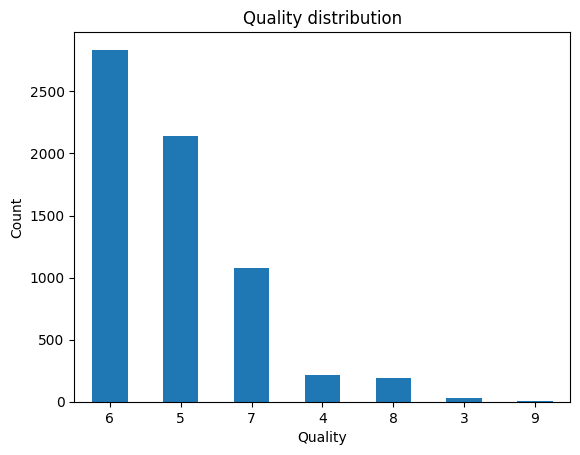

In [38]:
quality_cnt = wines["quality"].value_counts()
quality_cnt.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Quality distribution")
plt.xlabel("Quality")
plt.ylabel("Count")

Από το παραπάνω ραβδόγραμμα φαίνεται ότι η στήλη 'Quality' δεν είναι ισορροπημένη γιατί οι περισσότερες εγγραφές για το quality έχουν τιμή 6 και 5. Ενώ για 3-9 έχουμε ελάχιστες και για 1,2 και 10 δεν έχουμε καθόλου.

## Question 2

In [39]:
wines["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [40]:
wines["type"].where(wines["quality"]==9).value_counts()

type
white    5
Name: count, dtype: int64

Επειδή στα δεδομένα μας τα περισσότερα κρασιά είναι λευκά, δεν είναι λογικό να μετρήσουμε πόσα λευκά και πόσα κόκκινα έχουν βαθμολογία ίση με 9 (η υψηλότερη στα δεδομένα μας) διότι τα λευκά έχουν πολυ μεγαλύτερη πιθανότητα να είναι περισσότερα [φαίνεται ακριβώς από πάνω].

Για αυτό το λόγο, θα μετρήσουμε το ποσοστό του κάθε είδος κρασιού ανά βαθμολογία ποιότητας.


In [41]:
white_cnt = wines["type"].where(wines["type"]=='white').groupby(wines["quality"]).count()
white_perc = round((white_cnt/white_cnt.sum())*100, 2)
white_perc

quality
3     0.41
4     3.33
5    29.75
6    44.88
7    17.97
8     3.57
9     0.10
Name: type, dtype: float64

Text(0.5, 0, 'Quality')

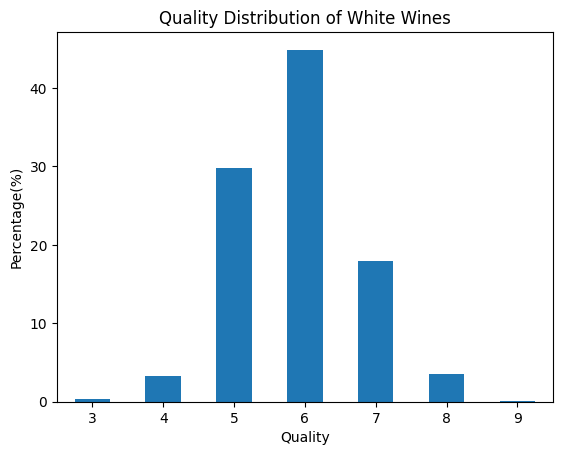

In [42]:
white_perc.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Quality Distribution of White Wines")
plt.ylabel("Percentage(%)")
plt.xlabel("Quality")

In [43]:
red_cnt = wines["type"].where(wines["type"]=='red').groupby(wines["quality"]).count()
red_perc = round((red_cnt/red_cnt.sum())*100, 2)
red_perc

quality
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
9     0.00
Name: type, dtype: float64

Text(0.5, 0, 'Quality')

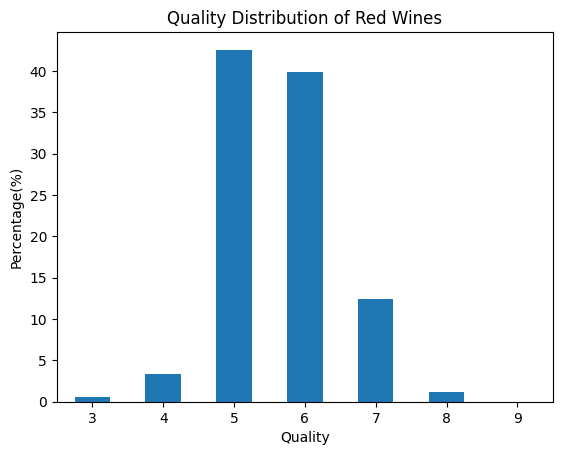

In [44]:
red_perc.plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Quality Distribution of Red Wines")
plt.ylabel("Percentage(%)")
plt.xlabel("Quality")

Παρατηρούμε ότι η μεγαλύτερη ποσότητα των λευκών κρασιών (44.88%) έχουν ποιότητα ίση με 6, ενώ τα περισσότερα κόκκινα κρασιά (42.59%) έχουν ποιότητα ίση με 5.
Οπότε από τα δεδομένα μας καταλήγουμε στο συμπέρασμα, ότι τα λευκά κρασιά είναι πιο ποιοτικά από τα κόκκινα.

## Question 3

Text(0, 0.5, 'Residual Sugar')

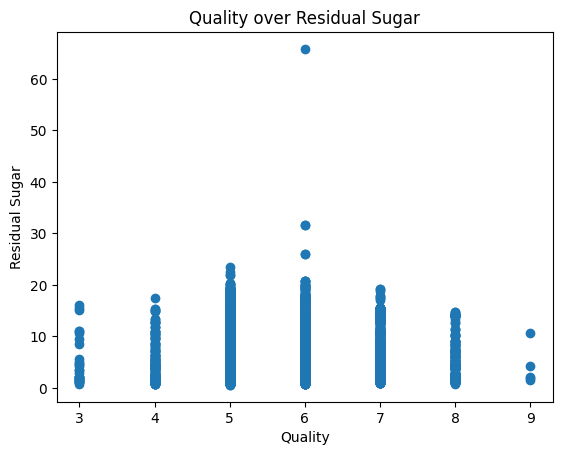

In [45]:
plt.scatter(wines["quality"], wines["residual sugar"])
plt.title("Quality over Residual Sugar")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

Από το διάγραμμα διασποράς φαίνεται ότι τα πιο γλυκά κρασιά, όπου η τιμή των υπολειπόμενων σακχάρων είναι μεγαλύτερη του 15, έχουν ποιότητα γύρω στο 5-6. Αντίθετα την καλύτερη ποιότητα 8-9, την έχουν τα κρασιά με τιμές υπολοιπόμενων σακχάρων μικρότερη του 15.

## Question 4

Επειδή ο DecisionTreeRegressor δεν μπορεί να έχει ως target string τιμή, θα ξανακάνουμε map τις τιμές του type όπως στο πρώτο μέρος της άσκησης.
- 0 -> white
- 1 -> red

In [46]:
wines["type"] = wines["type"].map({"white":0, "red":1})

In [47]:
x = np.array(wines.drop(columns=["quality"]))
y = np.array(wines["quality"])

x.shape, y.shape

((6497, 12), (6497,))

In [48]:
test_size = 0.1
seed = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

## Question 5

In [49]:
tree = DecisionTreeRegressor(random_state=seed)
tree.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [50]:
ypred = tree.predict(x_test)
mae = mean_absolute_error(y_test, ypred)

print(f"Model's mean absolute error: {mae:.2f}")

Model's mean absolute error: 0.46


## Question 6

In [51]:
test_size = 0.1
maes=[]
total=0
for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)

    tree = DecisionTreeRegressor(random_state=seed)
    tree.fit(x_train, y_train)

    ypred = tree.predict(x_test)
    mae = mean_absolute_error(y_test, ypred)
    maes.append(mae)
    total+=mae
    print(f"Model's mean absolute error for seed {seed}: {mae:.2f}")

print('-'*50)
avg_mae = total/10
print(f"Average mean absolute error: {avg_mae:.2f}")

sum = 0
for mae in maes:
    sum+=(mae-avg_mae)*(mae-avg_mae)
sum=sum/9

std=pow(sum,0.5)
print(f"Standard Deviation: {std:.2f}")

Model's mean absolute error for seed 0: 0.46
Model's mean absolute error for seed 1: 0.49
Model's mean absolute error for seed 2: 0.44
Model's mean absolute error for seed 3: 0.49
Model's mean absolute error for seed 4: 0.49
Model's mean absolute error for seed 5: 0.44
Model's mean absolute error for seed 6: 0.47
Model's mean absolute error for seed 7: 0.46
Model's mean absolute error for seed 8: 0.40
Model's mean absolute error for seed 9: 0.48
--------------------------------------------------
Average mean absolute error: 0.46
Standard Deviation: 0.03


Έχοντας υπολογίσει την μέση τιμή του error και την τυπική απόκλιση του, μπορούμε να προσδιορίσουμε ένα διάστημα προβλεπόμενου error για το μοντέλο μας.
Εφόσον η μέση τιμή του mean absolute error είναι 0.46, με τυπική απόκλιση 0.03 το διάστημα του προβλεπόμενου error θα είναι: 0.46±0.03 = [0.43,0.49]

## Question 7

In [52]:
seed=0
test_size=0.1

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

In [53]:
val_size=0.2

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=seed, test_size=val_size)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4677, 12), (1170, 12), (4677,), (1170,))

In [54]:
for i in range(18):
    if i<=8:
        criterion="squared_error"
        max_depth=i//3+3 #Gia na allazoun oi times ana 3 epanalipseis metaxu tou 3-4-5
    else:
        criterion="absolute_error"
        max_depth=(i-9)//3+3
    min_samples_split = (i%3+2) #Gia na pairnoume enalax tis times 2-3-4
    
    tree2 = DecisionTreeRegressor(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, random_state=seed)
    tree2.fit(x_train, y_train)
    
    ypred_train = tree2.predict(x_train)
    train_mae = mean_absolute_error(y_train, ypred_train)

    ypred_val = tree2.predict(x_val)
    val_mae = mean_absolute_error(y_val, ypred_val)

    print(f"Parameters: criterion={criterion}   max_depth={max_depth}   min_samples_split={min_samples_split}")
    print(f"Mean absolute error in training set: {train_mae:.4f}")
    print(f"Mean absolute error in validation set: {val_mae:.4f}")
    print("-"*50)

Parameters: criterion=squared_error   max_depth=3   min_samples_split=2
Mean absolute error in training set: 0.5835
Mean absolute error in validation set: 0.5900
--------------------------------------------------
Parameters: criterion=squared_error   max_depth=3   min_samples_split=3
Mean absolute error in training set: 0.5835
Mean absolute error in validation set: 0.5900
--------------------------------------------------
Parameters: criterion=squared_error   max_depth=3   min_samples_split=4
Mean absolute error in training set: 0.5835
Mean absolute error in validation set: 0.5900
--------------------------------------------------
Parameters: criterion=squared_error   max_depth=4   min_samples_split=2
Mean absolute error in training set: 0.5634
Mean absolute error in validation set: 0.5693
--------------------------------------------------
Parameters: criterion=squared_error   max_depth=4   min_samples_split=3
Mean absolute error in training set: 0.5634
Mean absolute error in validatio

Τώρα που βρήκαμε τον καλύτερο συνδυασμό των παραμέτρων, θα εκπαιδεύσουμε έναν νέο DecisionTreeRegressor με βλαση αυτές τις παραμέτρους και θα μετρήσουμε το error στο test set.

In [55]:
finetuned_tree = DecisionTreeRegressor(criterion='absolute_error', max_depth=5, min_samples_split=2, random_state=0)
finetuned_tree.fit(x_train, y_train)

ypred_tuned = finetuned_tree.predict(x_test)
tuned_mae = mean_absolute_error(y_test, ypred_tuned)
print(f"Mean absolute error on test set after fine tuning: {tuned_mae:.2f}")

Mean absolute error on test set after fine tuning: 0.53


## Question 8


Το πιο αξιόπιστο σετ δεδομένων για την επιλογή των παραμέτρων είναι το validation set, διότι στην προκειμένη περίπτωση παίρνει τον ρόλο του test set εφόσον το μοντέλο μας εκπαιδεύεται στο training set και δεν χρησιμοποιείται καθόλου το validation set κατά την διάρκεια της εκπαίδευσης. 

## Question 9

In [56]:
test_size = 0.1
seed = 0

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=seed, test_size=test_size)

In [57]:
parameters = {'criterion':('squared_error', 'absolute_error'), 'max_depth':[3,4,5], 'min_samples_split':[2,3,4]}
tree3 = DecisionTreeRegressor(random_state=seed)

best_tree = GridSearchCV(tree3, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
best_tree.fit(x_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'criterion': ('squared_error', ...), 'max_depth': [3, 4, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


## Question 10

In [58]:
ypred_grid = best_tree.predict(x_test)
grid_mae = mean_absolute_error(y_test, ypred)

print(f"Mean absolute error after GridSearchCV: {grid_mae:.2f}")

Mean absolute error after GridSearchCV: 0.99


Όπως φαίνεται και από τα αποτελέσματα του mean absolute error για την κάθε περίπτωση, η καλύτερη προσέγγιση είναι η περίπτωση όπου κάναμε εμείς το Fine tuning του μοντέλου.
Παρόλα αυτά, η πιο αξιόπιστη προσέγγιση, είναι η τελευταία γιατί χωρίζει τα δεδομένα μας σε 10 ξεχωριστά test sets, γεγονός που κάνει το μοντέλο μας πιο αξιόπιστο εφόσον κάθε φορά τεστάρετε σε διαφορετικό test set.

## Question 11

In [59]:
parameters = {'criterion':('squared_error', 'absolute_error'), 'min_samples_split':[2,3,4]}
tree4 = DecisionTreeRegressor(max_depth=5, random_state=seed)

final_tree = GridSearchCV(tree4, parameters, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
final_tree.fit(x_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'criterion': ('squared_error', ...), 'min_samples_split': [2, 3, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


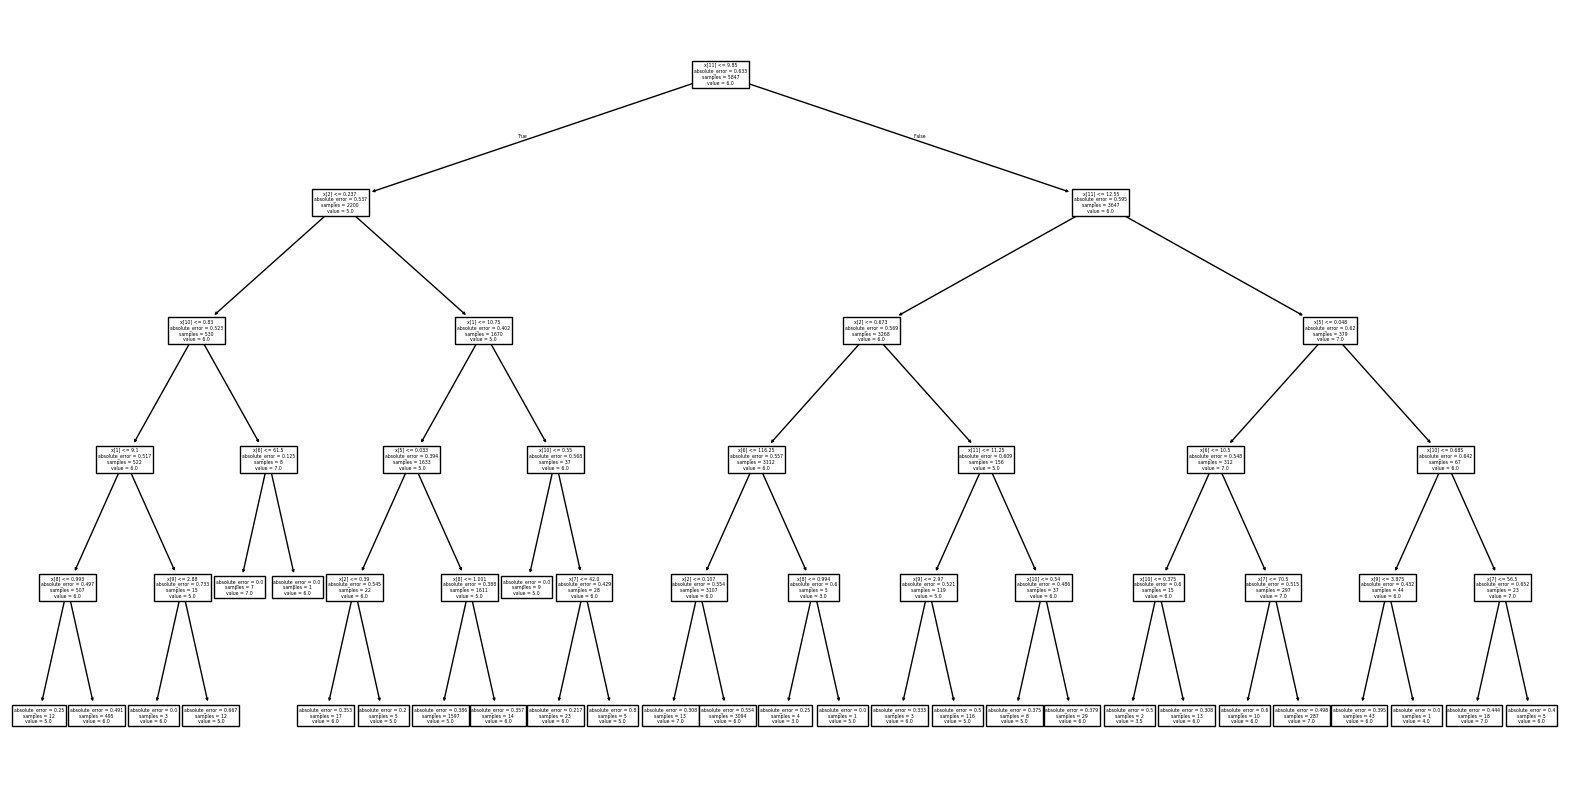

In [60]:
final_tree = final_tree.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(final_tree)
plt.show()

Σύμφωνα με το δέντρο μας, το μέγιστο σκορ ποιότητας που παίρνει ένα κρασί από την λίστα μας είναι το 7. Για να φτάσει σε αυτό το σκορ ένα κρασί υπάρχουν τα εξής σενάρια:
1) Να έχει **αλκοόλη<=9.85**, **σταθερή οξύτητα<=0.237**, **θειικά άλατα>0.53** και **ελεύθερο διοξείδιο του άνθρακα<=61.5**
2) Να έχει **9.85<αλκοόλη<=12.55**, **πτητική οξύτητα<=0.317** και **ελεύθερο διοξείδιο του θείου<=116,35**
3) Να έχει **αλκοόλη>12.55**, **χλωρίδια<=0.045**, **ελεύθερο διοξείδιο του θείου>10.5** και **συνολικό διοξείδιο του θείου>70.5**
4) Να έχει **αλκοόλη>12.55**, **χλωρίδια>0.045**, **θειικά άλατα>0.565** και  **συνολικό διοξείδιο του θείου<=56.5**

In [61]:
importances = final_tree.feature_importances_

sorted_idxs = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idxs]
    

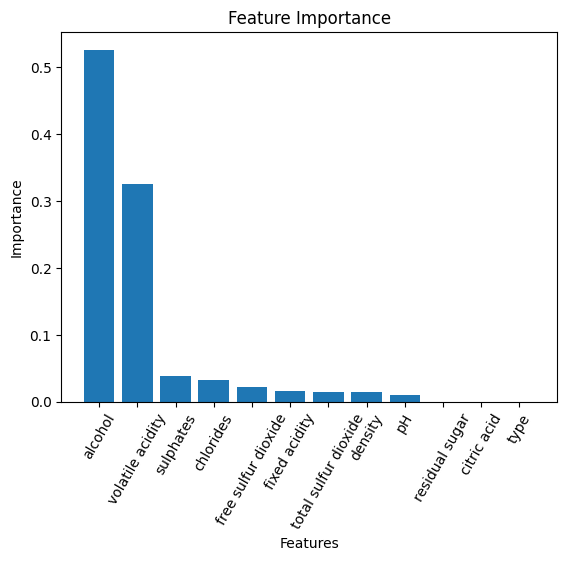

In [64]:
plt.bar([wines.columns[idx] for idx in sorted_idxs], sorted_importances)
plt.xticks(rotation=60)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Παρατηρούμε ότι για το καθορισμό της ποιότητας ενός κρασιού τελικά, δεν παίζει καθόλου ρόλο ο τύπος του (κόκκινο/λευκό), το κιτρικό οξύ και τα υπολειπόμενα σάκχαρα.
Σε αντίθεση, βλέπουμε ότι το μεγαλύτερο ρόλο τον παίζουν κατά σειρά:
1) Τα επίπεδα της αλκοόλης
2) Πτητική οξύτητα